<a href="https://colab.research.google.com/github/piaoyanxiu/vocab-collocation/blob/main/%EC%9C%B5%EC%86%8C%ED%94%84%ED%94%8C%EC%A0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,907 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import re

import  matplotlib
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt

import nltk

from nltk import word_tokenize, bigrams
from nltk.probability import ConditionalFreqDist
from nltk.util import ngrams


from collections import Counter

font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

plt.rc("font", family= font_name)

Mounted at /content/gdrive/


In [ ]:
file_directory="/content/gdrive/My Drive/Colab Notebooks/TXTData/모의고사 합본 텍파.txt"

with open(file_directory, 'r', encoding='cp949') as file:
    text_data = file.read()

In [ ]:
engl_text=re.sub("[^a-zA-Z.,:!?;’①②③④⑤ ]",'',text_data.lower())

result = re.split(r'[.,!?:;①②③④⑤]+', engl_text)

new_list = [element for element in result if element.strip() != ""]

print(new_list)


[' delizia     ', ' nest cave boat tour    ', 'stepladders', ' actually', ' it leads to the basement of the store', ' please connect me with the marketing department', ' no', ' the menswear is on the fifth floor of the store', ' well', ' the department store opens at  in the morning', ' not exactly', ' this is the direct number of the department', ' of course', ' she’ll be very happy to see you', ' thank you for the ride', ' say hello to daniel', ' how nice', ' i’ll call and thank her for the ride', ' never mind', ' i’ll take a bus to the baseball field', ' hurry up', ' you’ll be late for baseball practice again', ' man', ' great', ' it’ll be really nice if we sing together', ' thank you', ' i had a great time in your choir', ' think twice', ' it’s not easy to sing in a choir', ' actually', ' i’m not a big fan of classical music', ' never mind', ' the choir practice has been canceled', ' woman', ' i’m afraid i can’t go with you this time', ' i’m glad you’ve done the farm work in time',

In [ ]:
search=input('찾을 단어 입력: ')

ssearch=' '+search+' '

def filter(word, lst):
  search_lst=[]
  for sentence in lst:
    if word in sentence:
      search_lst.append(sentence)
  return search_lst

search_result=filter(ssearch, new_list)

찾을 단어 입력: vivid


In [ ]:
def tokenizer(text):
  words=[]
  for sentence in text:
    words.append(sentence.split())
  return words

tokens=tokenizer(search_result)

In [ ]:
def bigramfun(token_lst):
  bigram_ad=[]

  for token in token_lst:
    bigram_ad.append(bigrams(token))

  bigram_token = []

  for i in range(len(search_result)):
    bigram_list = [x for x in bigram_ad[i]]
    bigram_token.extend(bigram_list)

  return filter(search, bigram_token)

final_bigram=bigramfun(tokens)

In [ ]:
back=[]
front=[]

for i in range(len(final_bigram)):
  if final_bigram[i][0]==search:
    back.append(final_bigram[i][1])
  else:
    front.append(final_bigram[i][0])

In [ ]:
front_counter = Counter(front)

common_front=front_counter.most_common(10)

final_front=[]
front_weight=[]
for i in range(len(common_front)):
  final_front.append(common_front[i][0])
  front_weight.append(int(common_front[i][1])*100+500)

print(final_front)


back_counter = Counter(back)

common_back=back_counter.most_common(10)

final_back=[]
back_weight=[]
for i in range(len(common_back)):
  final_back.append(common_back[i][0])
  back_weight.append(int(common_back[i][1])*100+500)

print(final_back)

['more', 'the', 'to', 'using', 'most', 'a']
['and', 'when', 'view', 'threats', 'awareness', 'colors', 'dramatisation']


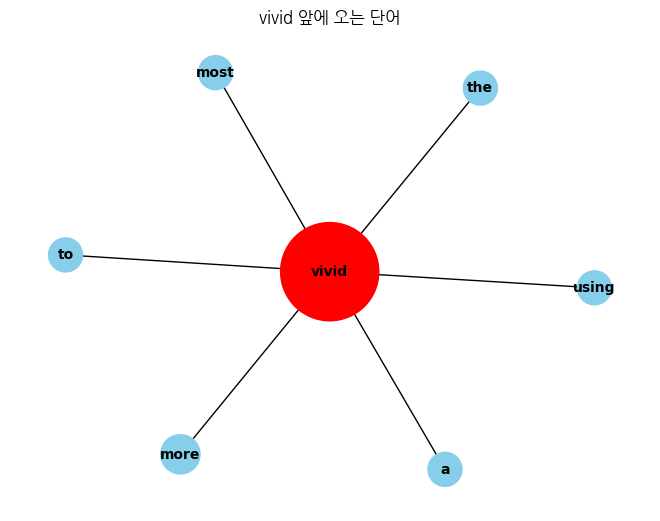

vivid 활용 문장 예시:

1.  and those elusive field marks more vivid and distinct in retrospect
2.  the downtown central science museum is the perfect spot to catch the vivid view
3.  a toilet that flushes is brought to vivid awareness
4.  using vivid colors for home decoration
5.  he formed special bonds with the artists he worked with and those relationships helped him capture some of his most vivid and iconic imagery
6.  vivid threats





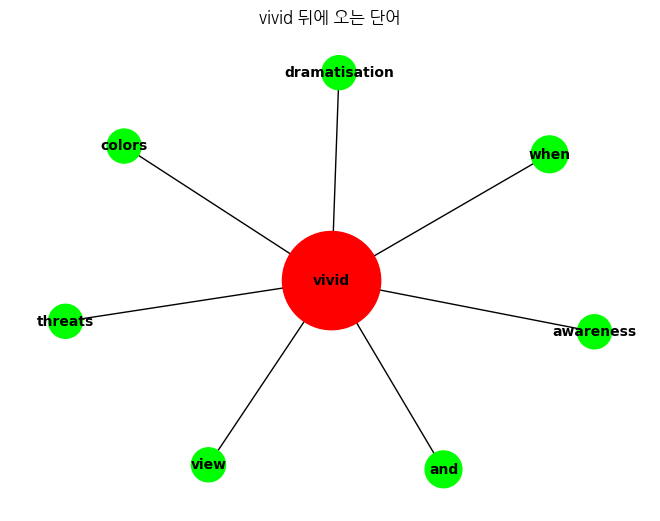

vivid 활용 문장 예시:

1.  imagined odors were more vivid when people could sniff than when they were wearing nose clips and unable to sniff
2.  a vivid dramatisation of a psychological journey


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_nodes_from(final_front)   # 앞에 오는 단어 노드 추가
G1.add_edges_from([(elem, search) for elem in final_front])   # 검색한 단어와 결과로 나온 단어들의 간선 생성

center_node = search  # 중심 노드는 검색한 단어

subgraph_nodes = [center_node] + list(G1.neighbors(center_node))
subgraph = G1.subgraph(subgraph_nodes)    # 서브그래프 생성

node_colors = ['red' if node == center_node else 'skyblue' for node in subgraph.nodes()]    # 중심 노드를 빨간색, 나머지 노드를 파란색으로 지정

nx.draw(subgraph, with_labels=True, font_weight='bold', node_color=node_colors, node_size=front_weight+[5000], font_size=10)

plt.title(search+' 앞에 오는 단어')
plt.show()

print(search+' 활용 문장 예시:\n')
printed_ssf=[]
n=1
for word in final_front:
  for ss in search_result:
    if word in ss:
      if ss not in printed_ssf:
        print(str(n)+'. '+ss)
        printed_ssf.append(ss)
        n+=1
        break

print('\n\n')




G2 = nx.Graph()

G2.add_nodes_from(final_back)

G2.add_edges_from([(elem, search) for elem in final_back])

subgraph_nodes = [center_node] + list(G2.neighbors(center_node))

subgraph = G2.subgraph(subgraph_nodes)

node_colors = ['red' if node == center_node else 'lime' for node in subgraph.nodes()]

nx.draw(subgraph, with_labels=True, font_weight='bold', node_color=node_colors, node_size=back_weight+[5000], font_size=10)

plt.title(search+' 뒤에 오는 단어')
plt.show()

print(search+' 활용 문장 예시:\n')
printed_ssb=[]
n=1
for word in final_back:
  for ss in search_result:
    if word in ss:
      if ss not in printed_ssb and ss not in printed_ssf:
        print(str(n)+'. '+ss)
        printed_ssb.append(ss)
        n+=1
        break


